In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch_dct import DCT_CONV
from utilities import show_heat_map, reduce_array
import torch

In [3]:
def curve_score(Targx, Targy, Testx, Testy):
    '''custom score that measures how low is Test compared to Target'''
    sc=0
    for x,y in zip(Testx,Testy):
        if x<Targx[0]: # x>Testx
            sc+= 0
        elif x >= Targx[-1]:
            sc += 0
        else:
            ind = [e>x for e in Targx].index(1) # first item > x in Targx
            # if ind<=0:
            #     print(ind) 
            d = (Targy[ind-1]+Targy[ind])/2-y   
            if (d>0):         
                sc = max(sc, d)
    return sc/max(Targy)

def load_tensor_img(str):
    im = np.array(Image.open(str))
    im = np.array(im).mean(axis=2) # convert to bw
    im = torch.FloatTensor(im)
    return im

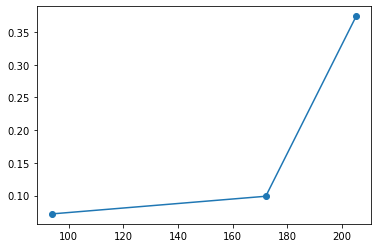

In [4]:

%matplotlib inline

M = DCT_CONV(ksize=8)
M.eval()
# M.show_net()
im = load_tensor_img("forged_images/cyg.png")

Lm,Lv= M.image_variance_hist(im, e_per_bin=100000, f_var=0.005)
plt.plot(Lm,Lv,'o-')

438 584
0 % done
20 % done
41 % done
61 % done
82 % done


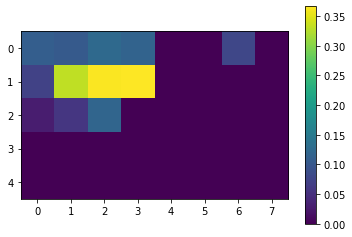

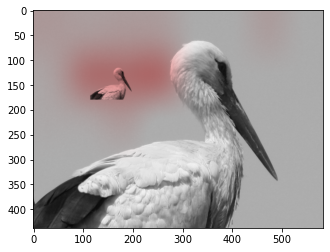

In [8]:
%matplotlib inline
im = load_tensor_img("forged_images/cyg.png")

Lm,Lv= M.image_variance_hist(im, e_per_bin=100000, f_var=0.005)
# Lv = [e if e<1 else 0 for e in Lv]
# plt.plot(Lm,Lv,'o-')

patch_size= 128
step = patch_size//2
n,m = im.shape
print(n,m)
new_n =len(range(0,n-patch_size,step))
new_m =len(range(0,m-patch_size,step))
percent_wrong = np.zeros((new_n,new_m))
mean_red = np.zeros((new_n,new_m))

for i in range(0,n-patch_size,step):
    print( int(100*i/(n-patch_size)), "% done" )
    for j in range(0,m-patch_size, step):
        Lm2,Lv2= M.image_variance_hist(im[i:i+patch_size,j:j+patch_size], e_per_bin=10000, f_var=0.005)
        # plt.plot(Lm2, Lv2)
        # plt.show()
        percent_wrong[i//step,j//step]=curve_score(Lm,Lv,Lm2,Lv2)
        mean_red[i//step,j//step] = im[i:i+patch_size,j:j+patch_size].mean()

# plt.plot(Lm2,Lv2,'o-')

plt.imshow(percent_wrong)
plt.colorbar()
plt.show()
plt.imshow(show_heat_map(im,percent_wrong))
plt.show()

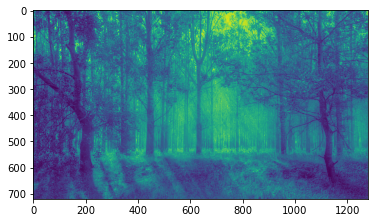

In [23]:
# im=load_tensor_img("forged_images/forest_rhino.jpg")
im=load_tensor_img("paysages/forest.jpg")


out = M(im)
plt.imshow(im)
arr = (out[36:]**2).mean(dim=0).detach()



0


/var/folders/b0/vdqv_k0s1w73jvkrsk0kfb7c0000gn/T/ipykernel_6104/1089597685.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  values = torch.masked_select(torch.tensor(arr), torch.tensor(mask))


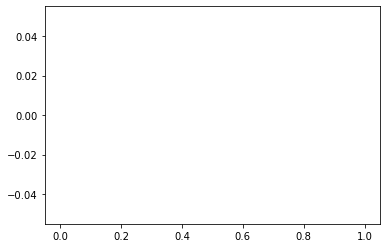

10


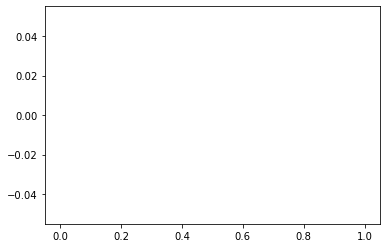

20


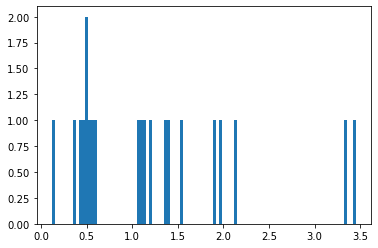

30


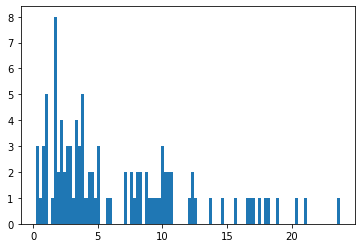

40


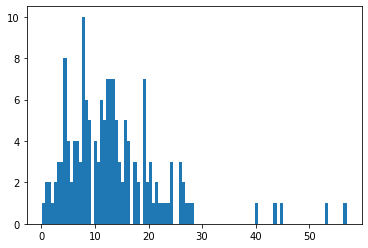

50


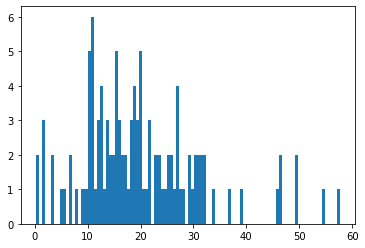

60


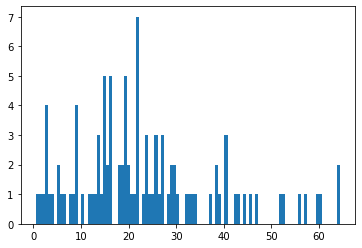

70


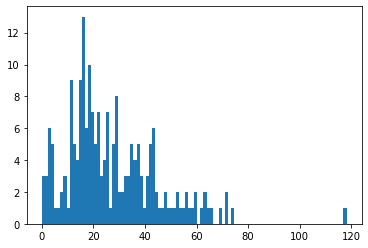

80


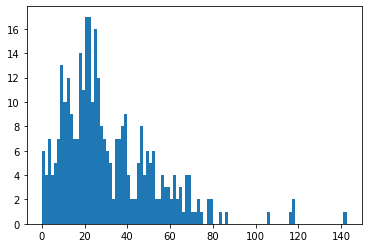

90


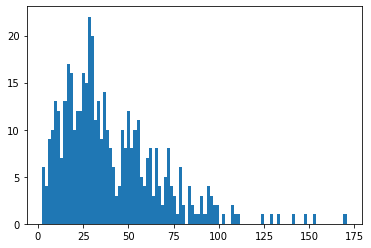

100


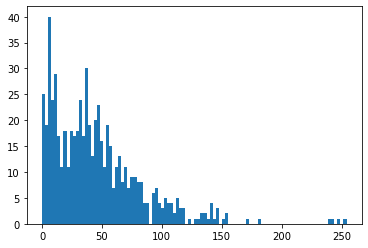

110


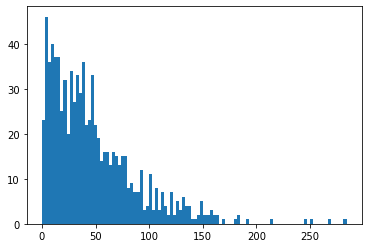

120


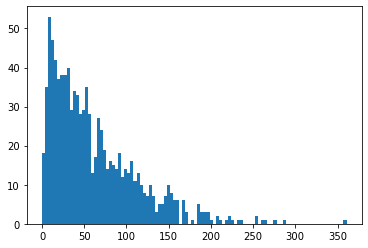

130


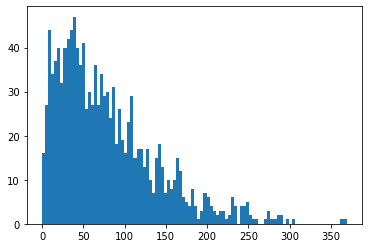

140


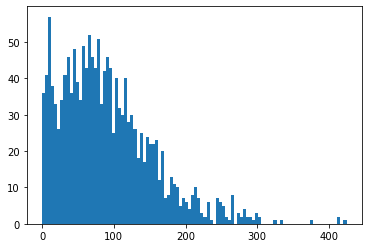

150


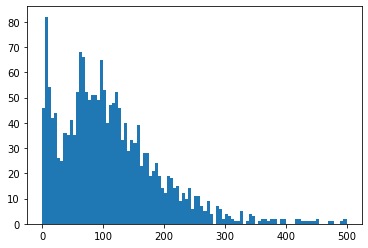

160


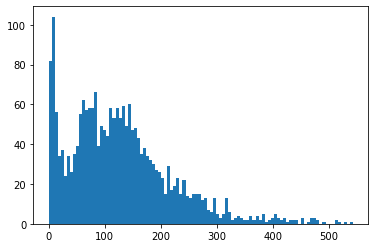

170


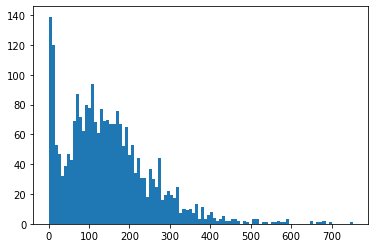

180


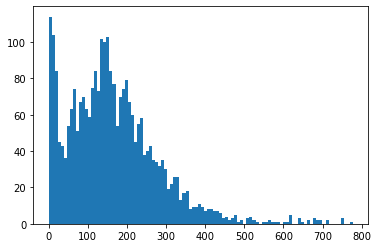

190


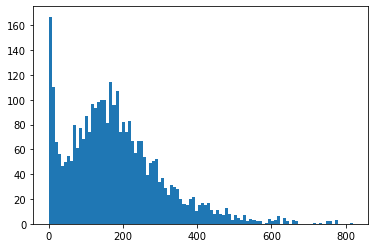

200


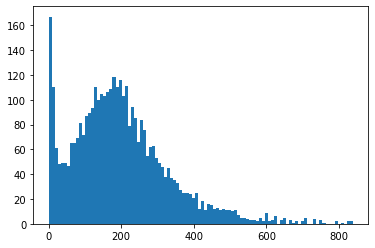

210


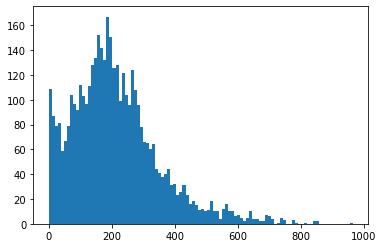

220


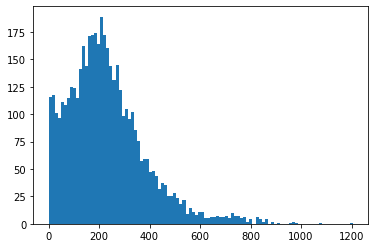

230


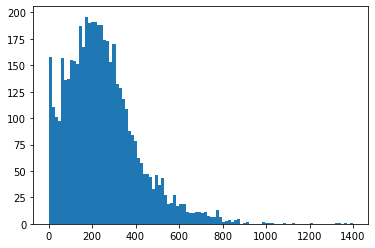

240


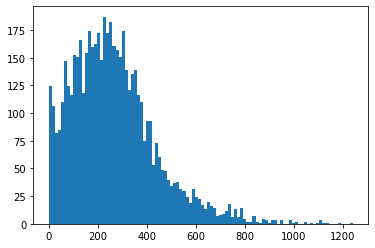

250


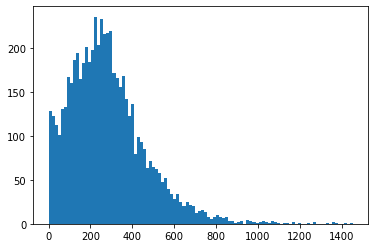

In [122]:

%matplotlib inline
arr = (out[36:]**2).mean(dim=0).detach()

step=10

means=[]

for i in range(0,255,step):
    mask = (out[0]>i)*(out[0]<i+step)
    print(i)
    values = torch.masked_select(torch.tensor(arr), torch.tensor(mask))
    means.append(values.mean())
    plt.hist(values.tolist(),bins=100)
    plt.show()

values = range(0,255,step)


/var/folders/b0/vdqv_k0s1w73jvkrsk0kfb7c0000gn/T/ipykernel_6104/565562954.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(values,np.log(means)/np.sqrt(values))


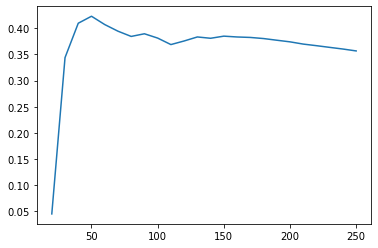

In [127]:
values=np.array(values)
plt.plot(values,np.log(means)/np.sqrt(values))


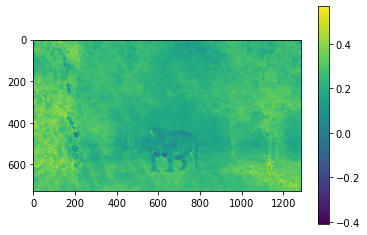

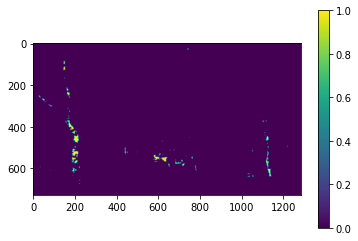

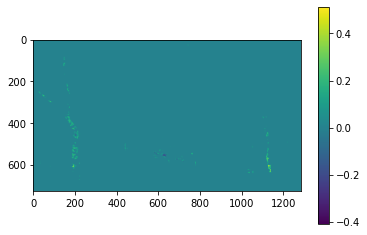

In [128]:
im = load_tensor_img("forged_images/forest_rhino.jpg")
out = M(im)
lowf = M.lowfreq_var(out)
arr = (out[36:]**2).mean(dim=0)
# arr = reduce_array(arr,4,np.mean)
# arr = reduce_array(arr,4,np.mean)

normalization = (torch.log(arr)/torch.sqrt(out[0])).detach()
# normalization = reduce_array(normalization,4,np.mean)
# normalization = reduce_array(normalization,4,np.mean)
plt.imshow(normalization)
plt.colorbar()
plt.show()
plt.imshow(-torch.log(lowf).detach()>-4)
plt.colorbar()
plt.show()
plt.imshow(normalization*(-torch.log(lowf).detach()>-4))
plt.colorbar()
plt.show()

